--- Schritt 2: LLM-reparierte Daten laden (Basis für FF3) ---
Datensatz geladen: ergebnisse/2.2_rfd_repaired_llm.csv (1326 Zeilen)

--- Schritt 3: Typkonvertierung und NaN-Behandlung ---
STATUS: Numerische Spalten erfolgreich in Float konvertiert und NaN mit 0 gefüllt.
price     float64
saving    float64
dtype: object

--- Schritt 4: Anwendung der IQR-Methode (erweiterte Zielspalten) ---

Starte IQR-Analyse für die erweiterten Zielspalten:
  Analysiere 'replies' | Q1: 5.00, Q3: 45.00, IQR: 40.00
  Untere Grenze: -55.00, Obere Grenze: 105.00
  -> Gefundene Ausreißer: 143 Zeilen
  Analysiere 'views' | Q1: 2191.75, Q3: 11146.25, IQR: 8954.50
  Untere Grenze: -11240.00, Obere Grenze: 24578.00
  -> Gefundene Ausreißer: 171 Zeilen
  Analysiere 'votes' | Q1: 1.00, Q3: 14.00, IQR: 13.00
  Untere Grenze: -18.50, Obere Grenze: 33.50
  -> Gefundene Ausreißer: 146 Zeilen
  Analysiere 'price' | Q1: 1.38, Q3: 139.99, IQR: 138.61
  Untere Grenze: -206.54, Obere Grenze: 347.91
  -> Gefundene Ausreißer

C:\Users\merdan\AppData\Local\Temp\ipykernel_15392\2425161176.py:150: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot_data = ax.boxplot(
C:\Users\merdan\AppData\Local\Temp\ipykernel_15392\2425161176.py:150: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot_data = ax.boxplot(
C:\Users\merdan\AppData\Local\Temp\ipykernel_15392\2425161176.py:150: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot_data = ax.boxplot(
C:\Users\merdan\AppData\Local\Temp\ipykernel_15392\2425161176.py:150: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; supp

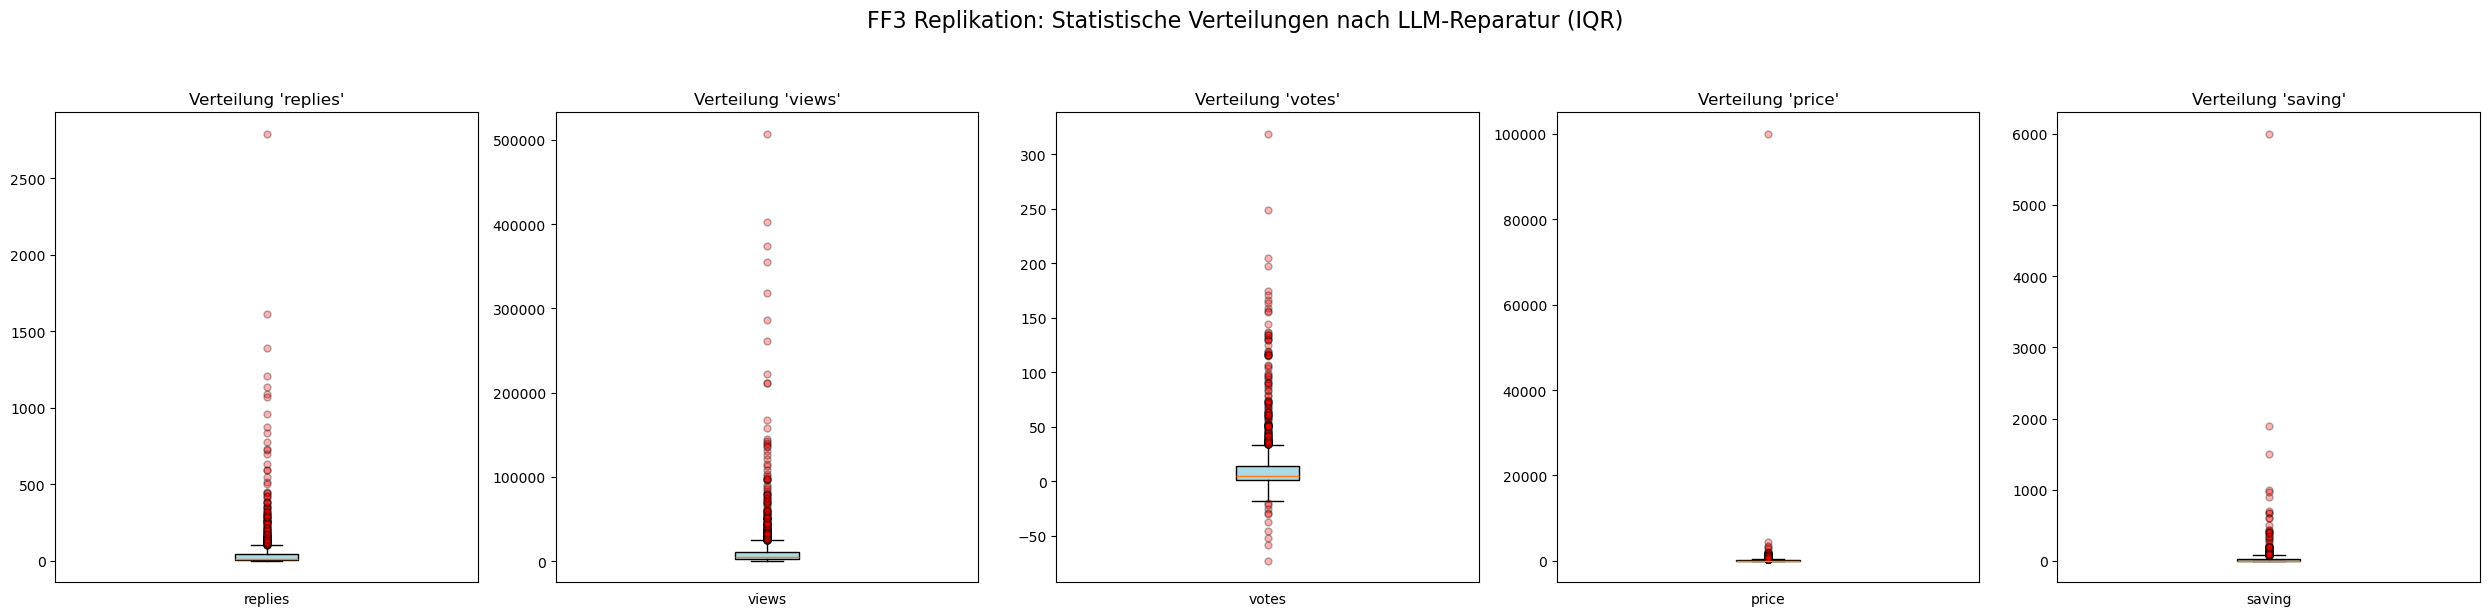


Visuelle Bestätigung:
-> Die Box-Plots zeigen nun die Ausreißerverteilung für 'price' und 'saving', was in FF1 nicht möglich war.
-> Die Verteilung von 'replies' und 'views' sollte sich im Vergleich zur Rohdaten-EDA (Skript 01) kaum verändert haben.

--- Schritt 6: Ergebnisse speichern und Zusammenfassung ---

Ergebnisse (IQR-Ausreißer-Flags) wurden in 'ergebnisse/3.1_iqr_ausreisser_indizes.csv' gespeichert.

--- ZUSAMMENFASSUNG EXPERIMENT 3.1 (IQR Replikation - LLM-Basis) ---
Methode:            Traditioneller IQR
Basisdaten:         ergebnisse/2.2_rfd_repaired_llm.csv
Zielspalten:        ['replies', 'views', 'votes', 'price', 'saving']
Gesamt-Ausreißer:   431 (mind. eine Zielspalte)
Ausreißer in replies: 143
Ausreißer in views: 171
Ausreißer in votes: 146
Ausreißer in price: 182
Ausreißer in saving: 96
DIES IST NUR EIN TEILERGEBNIS. Die finale Evaluation (Vergleich mit RAW/HOLOCLEAN) erfolgt im abschließenden Evaluierungs-Skript.


In [1]:
################################################################################
# MASTERARBEIT - SKRIPT 09:
# EXPERIMENT 3.1 (Forschungsfrage 3) - IQR REPLIKATION (LLM-Basis)
################################################################################
#
# ZWECK DIESES SKRIPTS (Methodik gemäß Forschungsfrage 3):
#
# 1. (Basis): Misst den Einfluss der vorherigen LLM-basierten Inkonsistenzbehebung (FF2.2)
#    auf die Ausreißererkennung.
#
# 2. (Datenbasis): Lädt den vom LLM reparierten Datensatz (2.2_rfd_repaired_llm.csv).
#
# 3. (Zielspalten): Erweitert die Analyse aus FF1 ('replies', 'views', 'votes')
#    um die nun numerisch gewordenen Spalten ('price', 'saving').
#
# 4. (Voraussetzung): Führt die notwendige erzwungene Typkonvertierung (Type Casting)
#    durch, damit die IQR-Methode auf den Preis- und Sparspalten angewendet werden kann.
#
# 5. (Speichern): Speichert die Ergebnisse für die abschließende Evaluation.
#
################################################################################

# Schritt 1: Notwendige Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# --- GLOBALE KONSTANTEN FÜR DIESES EXPERIMENT ---
# Wir replizieren die FF1-Methode, ändern aber die Basis und den Output-Pfad.
DATEIPFAD_LLM_REPAIRED = 'ergebnisse/2.2_rfd_repaired_llm.csv'
DATEIPFAD_OUTPUT = 'ergebnisse/3.1_iqr_ausreisser_indizes.csv'

# Zielspalten: FF1-Spalten + die durch FF2 reparierten Spalten
zielspalten = ['replies', 'views', 'votes', 'price', 'saving']

#
################################################################################

# SCHRITT 2: Laden der LLM-reparierten Daten (FF2.2 Ergebnis)
print("--- Schritt 2: LLM-reparierte Daten laden (Basis für FF3) ---")

try:
    # LLM-Daten laden (Index wird mitgeladen)
    df_llm = pd.read_csv(DATEIPFAD_LLM_REPAIRED, index_col='original_index')
    # Den Index zurücksetzen, um mit der RAW-Datenbasis abzugleichen (0 bis 1325)
    df_llm = df_llm.reset_index(drop=True)
    print(f"Datensatz geladen: {DATEIPFAD_LLM_REPAIRED} ({df_llm.shape[0]} Zeilen)")
except FileNotFoundError:
    print(f"FEHLER: LLM-Ergebnisdatei '{DATEIPFAD_LLM_REPAIRED}' nicht gefunden.")
    sys.exit("Skript gestoppt.")

#
################################################################################

# --- SCHRITT 3: Datentyp-Konvertierung (Voraussetzung für FF3) ---
print("\n--- Schritt 3: Typkonvertierung und NaN-Behandlung ---")

# Methodische Notwendigkeit: Wir müssen zeigen, dass die FF2-Reparatur
# die numerischen Spalten (price/saving) für die mathematischen FF3-Methoden
# (IQR/LOF) verwendbar gemacht hat.

try:
    numerische_spalten = ['price', 'saving']
    
    # Konvertierung zu Float erzwingen; fehlerhafte Werte werden zu NaN
    for col in numerische_spalten:
        df_llm[col] = pd.to_numeric(df_llm[col], errors='coerce')
    
    # NaN-Behandlung: IQR kann keine NaN verarbeiten.
    # Für Reproduzierbarkeit NaNs -> 0 (vereinfachender technischer Schritt)
    df_llm[numerische_spalten] = df_llm[numerische_spalten].fillna(0)
    
    print("STATUS: Numerische Spalten erfolgreich in Float konvertiert und NaN mit 0 gefüllt.")
    print(df_llm[numerische_spalten].dtypes)
    
except Exception as e:
    print(f"FEHLER bei der Typkonvertierung: {e}")
    sys.exit("Skript gestoppt.")

#
################################################################################

# SCHRITT 4: Definition und Anwendung der IQR-Methode (Replikation von FF1)
print("\n--- Schritt 4: Anwendung der IQR-Methode (erweiterte Zielspalten) ---")

def finde_ausreisser_iqr(daten, spalte):
    """
    Identifiziert Ausreißer in einer Spalte eines DataFrames mittels der
    1.5*IQR-Regel.
    """
    Q1 = daten[spalte].quantile(0.25)
    Q3 = daten[spalte].quantile(0.75)
    IQR = Q3 - Q1
    
    untere_grenze = Q1 - (1.5 * IQR)
    obere_grenze = Q3 + (1.5 * IQR)
    
    print(f"  Analysiere '{spalte}' | Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Untere Grenze: {untere_grenze:.2f}, Obere Grenze: {obere_grenze:.2f}")
    
    ausreisser_indizes = daten[
        (daten[spalte] < untere_grenze) | 
        (daten[spalte] > obere_grenze)
    ].index
    
    print(f"  -> Gefundene Ausreißer: {len(ausreisser_indizes)} Zeilen")
    return ausreisser_indizes

print("\nStarte IQR-Analyse für die erweiterten Zielspalten:")

# Für jede Zielspalte die Ausreißer-Indizes getrennt speichern
ausreisser_pro_spalte = {}

for spalte in zielspalten:
    indizes = finde_ausreisser_iqr(df_llm, spalte)
    ausreisser_pro_spalte[spalte] = set(indizes)

# Alle eindeutigen Ausreißer-Indizes (mindestens eine Spalte)
alle_ausreisser = set()
for spalte in zielspalten:
    alle_ausreisser.update(ausreisser_pro_spalte[spalte])

print("-" * 40)
print(f"Gesamtzahl einzigartiger Ausreißer (mind. eine Zielspalte, LLM-Basis): {len(alle_ausreisser)} Zeilen")
for spalte in zielspalten:
    print(f"Ausreißer in '{spalte}': {len(ausreisser_pro_spalte[spalte])}")
print("=" * 70)

#
################################################################################

# SCHRITT 5: Visualisierung der Ausreißer (Box-Plots)
print("\n--- Schritt 5: Visualisierung der Ausreißer (Box-Plots) ---")

print(f"Erstelle Box-Plots für die {len(zielspalten)} Zielspalten...")

fig, axes = plt.subplots(nrows=1, ncols=len(zielspalten), figsize=(25, 6))

fig.suptitle(
    'FF3 Replikation: Statistische Verteilungen nach LLM-Reparatur (IQR)',
    fontsize=16,
    y=1.05
)

for i, spalte in enumerate(zielspalten):
    ax = axes[i]
    
    box_plot_data = ax.boxplot(
        df_llm[spalte],
        vert=True,
        patch_artist=True,
        labels=[spalte],
        flierprops=dict(
            marker='o',
            markerfacecolor='red',
            markersize=5,
            alpha=0.3
        )
    )
    
    for patch in box_plot_data['boxes']:
        patch.set_facecolor('lightblue')
    
    ax.set_title(f"Verteilung '{spalte}'")
    ax.tick_params(axis='x', which='both', bottom=False)

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

print("\nVisuelle Bestätigung:")
print("-> Die Box-Plots zeigen nun die Ausreißerverteilung für 'price' und 'saving', was in FF1 nicht möglich war.")
print("-> Die Verteilung von 'replies' und 'views' sollte sich im Vergleich zur Rohdaten-EDA (Skript 01) kaum verändert haben.")
print("=" * 70)

#
################################################################################

# SCHRITT 6: Ergebnisse speichern und Zusammenfassung
print("\n--- Schritt 6: Ergebnisse speichern und Zusammenfassung ---")

os.makedirs('ergebnisse', exist_ok=True)

# DataFrame: Zeilen = alle Ausreißer-Indizes, Spalten = Flags pro Zielspalte
df_ergebnisse_iqr = pd.DataFrame(
    sorted(list(alle_ausreisser)),
    columns=['Index']
)

for spalte in zielspalten:
    df_ergebnisse_iqr[f'is_outlier_{spalte}'] = df_ergebnisse_iqr['Index'].isin(
        ausreisser_pro_spalte[spalte]
    )

# Speichern als CSV
ergebnis_dateipfad = DATEIPFAD_OUTPUT
df_ergebnisse_iqr.to_csv(ergebnis_dateipfad, index=False)

print(f"\nErgebnisse (IQR-Ausreißer-Flags) wurden in '{ergebnis_dateipfad}' gespeichert.")

# Zusammenfassung für die Masterarbeit
print("\n--- ZUSAMMENFASSUNG EXPERIMENT 3.1 (IQR Replikation - LLM-Basis) ---")
print("Methode:            Traditioneller IQR")
print(f"Basisdaten:         {DATEIPFAD_LLM_REPAIRED}")
print(f"Zielspalten:        {zielspalten}")
print(f"Gesamt-Ausreißer:   {len(alle_ausreisser)} (mind. eine Zielspalte)")
for spalte in zielspalten:
    print(f"Ausreißer in {spalte}: {len(ausreisser_pro_spalte[spalte])}")
print("=" * 70)
print("DIES IST NUR EIN TEILERGEBNIS. Die finale Evaluation (Vergleich mit RAW/HOLOCLEAN) "
      "erfolgt im abschließenden Evaluierungs-Skript.")
print("=" * 70)
